# Tutorial 1: Determinant and inverse

In [1]:
# Load packages:

# this package allows to work efficiently with arrays
import numpy as np
# this package is used to draw graphs
import matplotlib.pyplot as plt

In this implementation exercise, a naive method based on Laplace expansion is tested for the computation of determinants and inverses of large matrices. The objective is to observe how expensive such a method is. The next lectures and tutorials present smarter alternatives for such computations.

---

## Determinant of a 2 $\times$ 2 matrix

**Question 1**

a) Recall the formula of the determinant of a 2 $\times$ 2 matrix 

$$A = \left(\begin{array}{cc} a & b \\ c & d\end{array}\right).$$ 

b) For the test below, we use the matrix

$$B = \left(\begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array}\right).$$ 

Compute $det(B)$.

c) How many operations are performed?

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
a) $det(A) = ad - bc$

b) $det(B) = 1 \times 4 - 2 \times 3 = -2$

c) There are 3 operations: 2 multiplications and 1 subtractions.

---

**Question 2**

a) Implement a function that takes a $2\times2$ matrix in entry and returns its determinant using this formula. 

b) Test your algorithm on the matrix $B$ and compare it with the result obtained in 1.b. 

In [2]:
def det_22(A):
    """
    Compute the determinant of a 2x2 matrix
    ----------   
    parameters:
    A : matrix (numpy array of size 2,2)
    
    returns:
    det : determinant of A
    """

    ### write your formula here
    det = A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]

    return det

In [3]:
#Test the function det_22 with the following matrix
B = np.array([[1, 2], [3, 4]])
det_B = det_22(B)
print("det(B) = ", det_B)

det(B) =  -2


---

## Determinant of a 3 $\times$ 3 matrix

**Question 3**

a) Using Laplace expansion with respect to the first row, recall the determinant of the matrix 

$$ A = \left(\begin{array}{ccc} a & b & c \\ d & e & f \\ g & h & i\end{array}\right), $$

as a function of the vector $(a,b,c)$ and of determinants of $2\times2$ matrices.

b) For the test below, we use the matrix 

$$ B = \left(\begin{array}{ccc} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{array}\right).$$

Compute $det(B)$.

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
a) We first recall the expression for the laplace expansion of a matrix: The determinant of a matrix $A \in \mathbb{R}^{N \times N}$ satisfies for all $j=1, \ldots, N$
  $$
  \operatorname{det}(A)=\sum_{i=1}^N A_{i, j} \operatorname{Com}(A)_{i, j}=\sum_{i=1}^N A_{j, i} \operatorname{Com}(A)_{j, i} .
  $$
  Therefore we have the formula that
  $$
  \begin{aligned}
  \operatorname{det}(A) & =(-1)^{1+1} a\left|\begin{array}{cc}
  e & f \\
  h & i
  \end{array}\right|+(-1)^{1+2} b\left|\begin{array}{cc}
  d & f \\
  g & i
  \end{array}\right|+(-1)^{1+3} c\left|\begin{array}{ll}
  d & e \\
  g & h
  \end{array}\right| \\
  & =a(e i-h f)-b(d i-g f)+c(d h-g e),
  \end{aligned}
  $$

b) From the formula we have $det(B)=0$

---

**Question 4**

How many operations are required for: 
- the computation of the full determinant, knowing the vector $(a,b,c)$ and all the determinants of the $2\times2$ matrices 
- the computation of all the determinants of the $2\times2$ matrices 
- then the computation of the full determinant, knowing only $A$

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
- Since we know the vector $(a,b,c)$ and all the determinants of the $2\times2$ matrices, therefore we need 3 multiplications and 2 additions.
  - For each $2 \times 2$ determinant, we need 2 multiplications and 1 subtraction which is 3 operations in total.
  - Therefore, in total the operations are $3 \times 3 + 2 + 3= 14$
  - This corresponds to $det(A) = a(ei-fh) - b (di-gf) + c (dh-eg)$.
  
<br>

- If you consider the multiplication by $(-1)^{1+k}$ as an operation, then this makes 
  - the sum of three terms (2 additions; each term is of the form  $(-1)^{1+k} \times A_{1,k} \times \text{det}(A_{-1,-k})$ ).
  - Each of them composed of the 3 terms multiplied (2 multiplications).
  - Among them, the term $\text{det}(A_{-1,-k})$ is the determinant of a $2\times2$ matrix and requires 3 operations to be computed.

<br>

- In total, this makes 2 (sum of 3 terms) + 3 (nb of terms in the sum) $\times$ (2 (mult) +3 (det 2x2)) = <b>17 operations </b>.
  - This corresponds to the formula $det(A) = 1 \times a \times (ei-fh) + (-1) \times b \times (di-gf) + 1 \times c \times (dh-eg)$

---



**Question 5**

a) Implement a function that takes such a $3\times3$ matrix in entry and returns its determinant using this formula. 

***Indications:***
- You should use the function "det_22" you coded before.</li>
- You can use the function "delete" of numpy: 
    - delete(B, j, 0) returns the matrix B without the $j$-th row, 
    - delete(B, j, 1) returns the matrix B without its j-th column.

b) Test your algorithm on the matrix $B$ and compare it with the result obtained in 3.b. 

In [4]:
#Example of use of the function delete
B = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("B: \n", B, "\n")
print("delete(B, 1, 0):\n ", np.delete(B, 1, 0), "\n")
print("delete(B, 1, 1):\n", np.delete(B, 1, 1), "\n")

B: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

delete(B, 1, 0):
  [[1 2 3]
 [7 8 9]] 

delete(B, 1, 1):
 [[1 3]
 [4 6]
 [7 9]] 



In [5]:
def det_33(A):
    """
    Compute the determinant of a 3x3 matrix
    ----------   
    parameters:
    A : matrix (numpy array of size 3,3)
    
    returns:
    det : determinant of A
    """

    ### write your formula here
    det = 0
    for i in range(3):
        det += (-1)**(i + 2) * A[0, i] * det_22(
            np.delete(np.delete(A, 0, 0), i, 1))

    return det

In [6]:
#Test the function det_33
B     = np.array([[1,2,3],[4,5,6],[7,8,9]])

det_B = det_33(B)

print("det(B) = ", det_B)

det(B) =  0


---

## Determinant of a $N\times N$ matrix

**Important remark before starting:** 

In this section, we will implement a recursive algorithm, i.e. a function that calls itself in its definition. If possible, this type of algorithms should be avoided, because 
- It may create infinite loops if it is badly implemented (missing stopping criterium).
- It may fill the memory if the loop is too long. Especially, Python stores all the intermediate variables, and the storage increases very fast in the present algorithm.

The algorithm proposed here should break after few iterations, so <b>SAVE REGULARLY YOUR NOTEBOOK</b>.

**Question 6**  

Using again Laplace expansion with respect to the first row, recall the determinant of the matrix $A \in \mathbb{R}^{N\times N}$ as a function of the vector $V = (A_{1,i})_{i=1,\dots,N}$ and of determinants of smaller matrices of size $(N-1)\times(N-1)$. 

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
**Answer:** 
Again recall the expression for the laplace expansion of a matrix: The determinant of a matrix $A \in \mathbb{R}^{N \times N}$ satisfies for all $j=1, \ldots, N$
$$
\operatorname{det}(A)=\sum_{i=1}^N A_{i, j} \operatorname{Com}(A)_{i, j}=\sum_{i=1}^N A_{j, i} \operatorname{Com}(A)_{j, i} .
$$
Therefore we have the formula that
$$
\operatorname{det}(A) = \sum_{i=1}^N (-1)^{i+1} A_{1,i} \operatorname{Com}(A)_{1,i}
$$

---

**Question 7**

a) How many operations are required for: 
- The computation of the full determinant, knowing the vector $V$ and all the determinants of the smaller matrices as a function $N$.
- then for the computation of each determinant of the smaller matrices of size $(N-1)\times(N-1)$ in terms of the $N-2$ step.

b) How many determinants of size $(N-1)\times(N-1)$ are necessary? Then of size $(N-2)\times(N-2)$? </li>

c) Using a similar iterative sequence, write a formula for the quantity $Q_N$ of operations required for the computation of a determinant of a $N\times N$ matrix as a function of $Q_{N-1}$ and $N$. Compare this sequence to the sequence $N!$.</li>

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
- - Since we know the vector $V$ and all the determinants of the smaller matrices, therefore we need $N-1$ additions and $2N$ multplications ($(-1)^{k}$ and $com(A)$), which in total are 3N-1.
  - For the same reason, with the de terminant of size $N-1$ we got $3(N-1)-1$ operations in total.

- - The number of determinants of size $(N-1)\times(N-1)$ is $N$.
  - The number of determinants of size $(N-2)\times(N-2)$ is $N-1$.

- We have the recursion formula that
  $$
  Q_N = 3N-1 + N Q_{N-1}
  $$
  where from the previous question we have $Q_{2} = 3$.

---

**Question 8**

a) Save your notebook, and save it regularly while debugging.

b) In the test below, we use the matrix 

$$ B = \left( \begin{array}{cccc} 1 & 2 & 3 & 4 \\ 5 & 6 & 7 & 8 \\ 9 & 10 & 11 & 12 \\ 13 & 14 & 15 & 16 \end{array}\right).$$

Compute $det(B)$. 

c) Using Laplace formula with respect to the first row of $A$, implement a function that takes a matrix $A\in\mathbb{R}^{N\times N}$, and the size $N$ in entry and returns its determinant. 

***Indications:***
- This algorithm should exploit the functions 
    - "det_22" if $N=2$,
    - or "det_NN" itself with a new $N'=N-1$ if $N>2$ (recursive definition)
- You may use the function "delete" of numpy.

d) Test your algorithm on the matrix $B$ and compare it with the result obtained in 8.b. 

In [10]:
def det_NN(A, N):
    """
    Compute the determinant of a NxN matrix
    ----------   
    parameters:
    A : matrix (numpy array of size N,N)
    N : size of the matrix
    
    returns:
    det : determinant of A
    """

    ### modify this algorithm
    det = 0

    if (N == 2):
        ### return the determinant of a 2x2 matrix
        det += det_22(A)
        return det
    else:
        ### return the determinant of a NxN matrix using Laplace expansion
        for i in range(N):
            sub_mat = np.delete(np.delete(A, 0, axis=0), i, axis=1)
            sub_det = det_NN(sub_mat, N - 1)
            det += (-1)**i * A[0, i] * sub_det
            
    return det

In [11]:
#Test this function
B = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
det_B = det_NN(B, 4)

print("det(B) = ", det_B)

det(B) =  0


**Question 9**

Now copy your algorithm. And add a counter of operations performed for the computation of the determinant. 

a) Test your algorithm with the provided $4\times4$ matrix and verify the obtained number of operations.

b) Test your algorithm with the identity matrices of size $N = 2,...,6$ and plot the number of operations as a function of $N$. 

c) Verify the formula of $Q_N$ found in 7.c.

In [18]:
def det_NN_count(A, N):
    """
    Compute the determinant of a NxN matrix
    ----------   
    parameters:
    A       : matrix (numpy array of size N,N)
    N       : size of the matrix
    counter : 
    
    returns:
    det     : determinant of A
    counter : number of operations performed in the algorithm
    """

    ### modify this algorithm
    det = 0
    counter = 0

    if (N == 2):
        ### return the determinant of a 2x2 matrix
        det += det_22(A)
        counter += 3
        return det, counter
    else:
        ### return the determinant of a NxN matrix using Laplace expansion
        for i in range(N):
            sub_mat = np.delete(np.delete(A, 0, axis=0), i, axis=1)
            sub_det = det_NN(sub_mat, N - 1)
            det += (-1)**i * A[0, i] * sub_det

        counter += 3 * N - 1 + N * det_NN_count(sub_mat, N - 1)[1]

    return det, counter

In [19]:
#Test this function
B = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])

det_B, counter_op = det_NN_count(B, len(B))

print("det(B) = ", det_B)
print("number of operations = ", counter_op)

det(B) =  0
number of operations =  79


<Figure size 432x288 with 0 Axes>

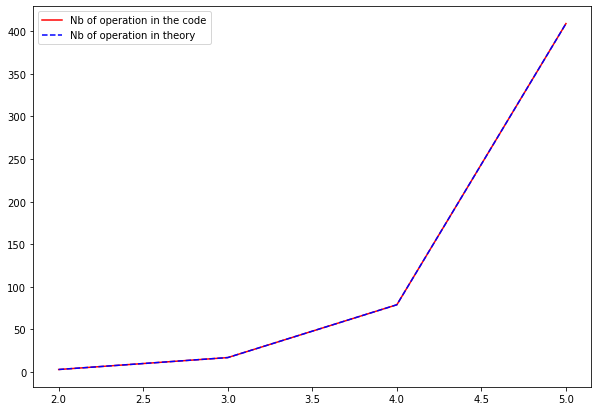

In [23]:
# maximum size of the matrix
N = 6

# number of operations (algo and theory)
c = np.zeros(N - 2)
c_ref = np.zeros(N - 2)

# loop on the size of matrix
for i in range(2, N):
    # example of matrix of size i (only the size matters to compute the number of operations)
    B = np.eye(i)

    # count the number of operation by the algorithm
    det_B, c[i - 2] = det_NN_count(B, i)
    # modify with the value found in 7.c (theory)
    if (i == 2):
        c_ref[i - 2] = 3
    else:
        c_ref[i - 2] = 3 * i - 1 + i * c_ref[i - 3]

# plot the number of operation as a function of N
plt.figure(1)
plt.figure(figsize=(10, 7))
plt.plot(range(2, N), c, color='red', label="Nb of operation in the code")
plt.plot(range(2, N),
         c_ref,
         '--',
         color='blue',
         label="Nb of operation in theory")
plt.legend()
plt.show()

**Question 10** 

a) <b>Save your notebook</b> before every run. 

b) Test again your algorithm with a $N\times N$ matrix with $N=15$.

c) Up to which $N$ is your code efficient? And for which $N$ is it impossible to use? 

**Answer:** 

---

## Computation of the inverse

**To go further:**

**Questions 11**

 Recall Cramer's formula for the solution of the linear system $A V = b$. 


<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
Consider a linear equation $A V=b$ with $\operatorname{det}(A) \neq 0$, then its solution satisfies
$$
V_i=\frac{\operatorname{det}\left(C^1, \ldots, C^{i-1}, b, C^{i+1}, \ldots, C^N\right)}{\operatorname{det}(A)},
$$
where $C^i$ is the $i$-th column of $A$.

---

**Question 12**

 Implement an algorithm to solve a linear system $AV=b$ using the functions "det_NN", and test it with the matrix provided.

In [26]:
def Cramer(A, b):
    """
    Solves the problem AV = b with Cramer's formula
    ----------   
    parameters:
    A       : matrix (numpy array of size N,N)
    b       : RHS vector (numpy array of size N)
    counter : 
    
    returns:
    V     : solution of the problem AV = b
    """

    ### Write your formula
    det = det_NN(A, len(A))
    B = A.copy()

    V = np.zeros(len(b))
    for i in range(len(b)):
        B[:, i] = b  # substitute the i-th column of A by b
        V[i] = det_NN(B, len(A)) / det
        B = A.copy()

    return V

In [27]:
N = 5

B = np.ones((N, N)) + (N + 2.) * np.eye(N)
B[0, 0] = 0
b = np.ones(N)
b[-1] = 2
sol = Cramer(B, b)

print("V  = ", sol)
print("AV = ", np.matmul(B, sol))


V  =  [-1.5         0.21428571  0.21428571  0.21428571  0.35714286]
AV =  [1. 1. 1. 1. 2.]


**Question 13**

Count the number of operations required to compute this solution with Cramer's formula for different $N$. 

---

## Tutorial Exercises

**Exercise 2).** Consider the following matrix:
$$
A=\left(\begin{array}{llll}
1 & 0 & 2 & 0 \\
1 & 1 & 1 & 1 \\
3 & 1 & 6 & 0 \\
0 & 2 & 0 & 1
\end{array}\right), \quad B=\left(\begin{array}{ccccccc}
1 & 2 & 3 & 0 & 1 & 1 & 2 \\
1 & 1 & 1 & 0 & 2 & 1 & 1 \\
1 & 3 & 2 & 0 & 1 & 1 & 3 \\
1 & 4 & 1 & 1 & 2 & 3 & 2 \\
1 & 1 & 4 & 0 & 1 & 1 & 3 \\
1 & 2 & 2 & 0 & 2 & 1 & -1 \\
1 & -1 & 1 & 0 & 1 & 1 & 1
\end{array}\right) .
$$
1. Compute the determinants of $A$ and $B$.

2. When it is possible, compute its inverse.

In [30]:
A = np.array([[1, 0, 2, 0], 
              [1, 1, 1, 1], 
              [3, 1, 6, 0],
              [0, 2, 0, 1]])

print("det(A) = ", det_NN(A, len(A)))
  
B = np.array([[1, 2, 3, 1, 1, 2], 
              [1, 1, 1, 2, 1, 1],
              [1, 3, 2, 1, 1, 3],
              [1, 1, 4, 1, 1, 3],
              [1, 2, 2, 2, 1, -1],
              [1, -1, 1, 1, 1, 1]])

print("det(B) = ", det_NN(B, len(B)))

det(A) =  1
det(B) =  0


<table>
<tr>   
<td bgcolor = lightgreen ><font color = white >Solution</td>
</tr>
</table>

---
$$
\operatorname{det}(A)=1, \quad A^{-1}=\frac{1}{1}\left(\begin{array}{cccc}
-7 & 2 & 2 & -2 \\
-3 & 0 & 1 & 0 \\
4 & -1 & -1 & 1 \\
6 & 0 & -2 & 1
\end{array}\right), \quad \operatorname{det}(B)=(-1)^{4+4} 1\left|\begin{array}{cccccc}
1 & 2 & 3 & 1 & 1 & 2 \\
1 & 1 & 1 & 2 & 1 & 1 \\
1 & 3 & 2 & 1 & 1 & 3 \\
1 & 1 & 4 & 1 & 1 & 3 \\
1 & 2 & 2 & 2 & 1 & -1 \\
1 & -1 & 1 & 1 & 1 & 1
\end{array}\right|=0
$$

We can find determinant $det(B)$ that the column 1 and 5 is equal, so we can get $det(B)=0$

---


In [37]:
def matrix_transpose(A):
    for i in range(len(A)):
        for j in range(i + 1, len(A)):
            A[i, j], A[j, i] = A[j, i], A[i, j]
            
    return A

def matrix_inverse(A, N):
    """
    Compute the inverse of a NxN matrix
    ----------   
    parameters:
    A : matrix (numpy array of size N,N)
    N : size of the matrix
    
    returns:
    A_inv : inverse of A
    """

    ### modify this algorithm
    A_inv = np.zeros((N, N))

    det = det_NN(A, N)
    B = A.copy()

    for i in range(N):
        for j in range(N):
            B[:, j] = np.eye(N)[:, i]  # substitute the j-th column of A by the i-th column of the identity matrix
            A_inv[i, j] = det_NN(B, N) / det
            B = A.copy()

    return matrix_transpose(A_inv)

In [38]:
print("We have the inverse matirx")
print(matrix_inverse(A, len(A)))

We have the inverse matirx
[[-7.  2.  2. -2.]
 [-3.  0.  1.  0.]
 [ 4. -1. -1.  1.]
 [ 6.  0. -2.  1.]]
